# Kiran Avhad

# Task 4 :-stock market prediction using Numerical and Textual  Analysis

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.436470
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,74.086395
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.278160
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.877136
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,77.050926


In [2]:

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head(20)

Date
2009-12-31   NaN
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
2010-01-19   NaN
2010-01-20   NaN
2010-01-21   NaN
2010-01-22   NaN
2010-01-25   NaN
2010-01-26   NaN
2010-01-27   NaN
2010-01-28   NaN
2010-01-29   NaN
Name: Adj Close, dtype: float64

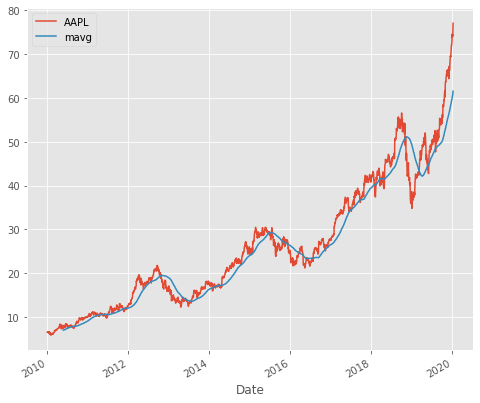

In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()
plt.show()

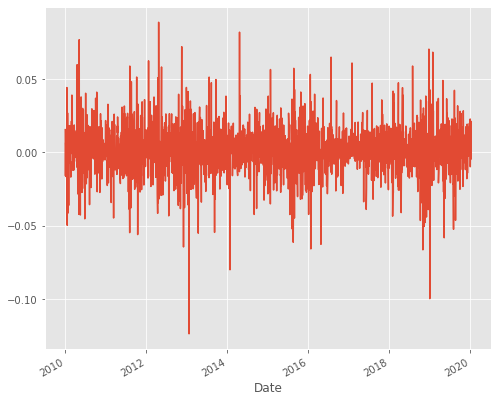

In [4]:

rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')
plt.show()

In [5]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()


Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,6.503574,10.493408,308.832428,92.406113,23.801456
2010-01-04,6.604801,10.715343,312.204773,93.500313,24.168472
2010-01-05,6.616219,10.770829,310.829926,92.370834,24.176279
2010-01-06,6.510980,10.715343,302.994293,91.770790,24.027906
2010-01-07,6.498945,11.270185,295.940735,91.453102,23.778025


In [6]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.021150,0.010920,0.011841,0.015420
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005152,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001848,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008821,0.009638,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006607
2010-01-13,0.014105,0.003578,-0.005741,-0.002145,0.009312


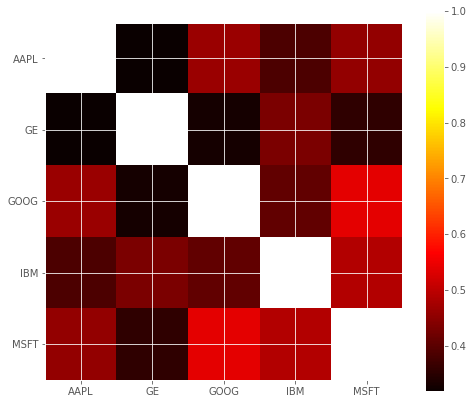

In [7]:

plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

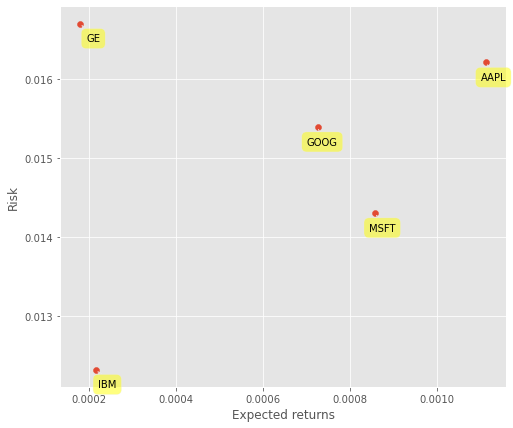

In [8]:

plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [10]:

df1 = pd.read_csv('D:/FILM/india-news-headlines.csv')
df1.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [11]:
df1.tail(10)

,publish_date,headline_category,headline_text
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...
3297163,20200630,entertainment.hindi.bollywood,sushant singh rajputs demise fans trend cbifor...
3297164,20200630,entertainment.hindi.bollywood,amitabh bachchans grandson agastya nanda prepp...
3297165,20200630,home.education,icse isc result 2020 when where to check class...
3297166,20200630,city.lucknow,up govt imposes weekend restrictions from tonight
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [12]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [13]:
df1.describe()

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [14]:
df1.max()

publish_date                                                  20200630
headline_category                                          young-turks
headline_text        ~!The 7 Plexus Knots story in a Galaxy called ...
dtype: object

In [15]:

df1.min()

publish_date                                20010101
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [16]:
df1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [17]:
df1.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [18]:
df1.corr()

,publish_date
publish_date,1.0


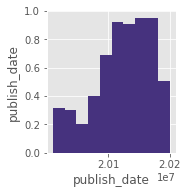

In [19]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

In [20]:
df1['headline_text'].value_counts()

Sunny Leone HOT photos                                                                                98
Watch top news in one-minute                                                                          90
Official Site                                                                                         89
Football: Italian Serie A table                                                                       88
Football: Spanish La Liga table                                                                       86
                                                                                                      ..
Children choose Maruti's look in 'Hanuman Da Damdaar'                                                  1
22 gamblers arrested in Ahmedabad                                                                      1
Panel for checks on hire-and-fire labour policy                                                        1
At Pakistan's urging; China blocks India's attempt to e

In [21]:
df1['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
ballot-talk                     7
sports.headline3                7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

In [26]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]